In [1]:
from PIL import Image

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np

In [4]:
from IPython.html import widgets
from IPython.html.widgets import interact
from IPython.display import display

/Users/j35/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
from PyQt4 import QtGui

In [6]:
import imreg_dft as ird

In [67]:
import scipy as sp  #this won't work withou imreg_dft somehow!!!

### Define working images

In [68]:
file1 = 'simple_data_set/image1.png'
file2 = 'simple_data_set/image2.png'

In [69]:
print("file1 exist? %s" %os.path.isfile(file1))
print("file2 exist? %s" %os.path.isfile(file2))

file1 exist? True
file2 exist? True


### Load the images

In [70]:
im1 = sp.misc.imread(file1)
im1 = im1[:, :, 0]
[y_size_image, x_size_image] = im1.shape

In [21]:
im2 = sp.misc.imread(file2)
im2.shape
im2 = im2[:, :, 0]

### Calculate the transformation to apply to second image

In [22]:
result = ird.similarity(im1, im2, numiter=3)

/Users/j35/anaconda/lib/python3.4/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


In [23]:
result['scale']

0.99626920220235782

In [24]:
result['angle']

0.049039866684779554

In [25]:
result['success']

0.52904283097236027

In [26]:
result['tvec']

array([  4.44981135, -89.20747261])

In [27]:
result['timg']   #the transformed image

array([[ 254.83702375,  254.89126442,  254.9507876 , ...,  254.7065862 ,
         254.74468728,  254.78815573],
       [ 254.83756604,  254.89097744,  254.94958329, ...,  254.70910551,
         254.74663014,  254.78944057],
       [ 254.83860225,  254.89146811,  254.94946866, ...,  254.71143004,
         254.74858166,  254.79096327],
       ..., 
       [ 255.        ,  255.        ,  255.        , ...,  254.6982482 ,
         254.73933933,  254.7862046 ],
       [ 255.        ,  255.        ,  255.        , ...,  254.70111157,
         254.74099115,  254.78648141],
       [ 255.        ,  255.        ,  255.        , ...,  254.70390727,
         254.74279185,  254.78715183]])

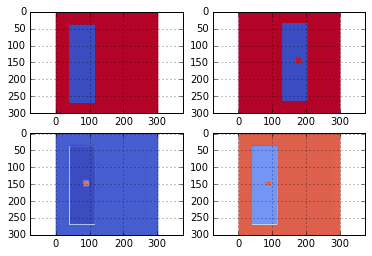

In [29]:
ird.imshow(im1, im2, result['timg']);

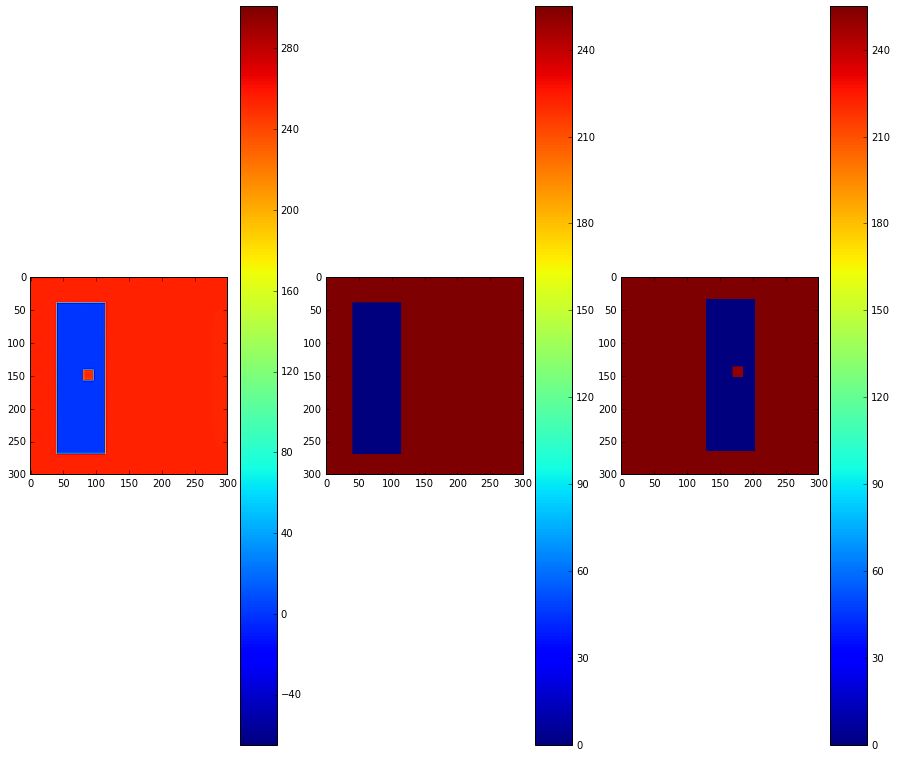

In [37]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(result['timg'])
plt.colorbar()
plt.subplot(132)
plt.imshow(im1)
plt.colorbar()
plt.subplot(133)
plt.imshow(im2)
plt.colorbar()

### !! The transformation to apply seems correct, but the intensities returned are wrong !

## So let's try to apply the correction calculated and see if we can get the images registered

In [40]:
xoffset = int(result['tvec'][0])
print(xoffset)

4


In [41]:
yoffset = int(result['tvec'][1])
print(yoffset)

-89


In [62]:
def translate_array(old_array, xoffset, yoffset):
    
    [ysize, xsize] = old_array.shape
    new_array = np.zeros((ysize, xsize))
    
    if xoffset < 0:
        old_array_from_x = xoffset
        old_array_to_x = xsize
        new_array_from_x = 0
        new_array_to_x = xsize - abs(xoffset)

    elif xoffset > 0:
        old_array_from_x = 0
        old_array_to_x = xsize - xoffset
        new_array_from_x = xoffset
        new_array_to_x = xsize
    
    else:
        old_array_from_x = 0
        old_array_to_x = xsize
        new_array_from_x = 0
        new_array_to_x = xsize
    
    if yoffset < 0:
        old_array_from_y = abs(yoffset)
        old_array_to_y = ysize
        new_array_from_y = 0
        new_array_to_y = ysize - abs(yoffset)
    
    elif yoffset > 0:
        old_array_from_y = 0
        old_array_to_y = ysize - yoffset
        new_array_from_y = yoffset
        new_array_to_y = ysize
    
    else:
        old_array_from_y = 0
        old_array_to_y = ysize
        new_array_from_y = 0
        new_array_to_y = ysize
    
    print('working with x')
    print("old_array_from_x: %d" %old_array_from_x)
    print("old_array_to_x: %d" %old_array_to_x)
    print()
    print("new_array_from_x: %d" %new_array_from_x)
    print("new_array_to_x: %d" %new_array_to_x)

    print("\n")
    print("working with Y")
    print("old_array_from_y: %d" %old_array_from_y)
    print("old_array_to_y: %d" %old_array_to_y)
    print()
    print("new_array_from_y: %d" %new_array_from_y)
    print("new_array_to_y: %d" %new_array_to_y)


    
    
    new_array[new_array_from_x: new_array_to_x, new_array_from_y: new_array_to_y] = \
    old_array[old_array_from_x: old_array_to_x, old_array_from_y: old_array_to_y]
    
    return new_array
            

In [63]:
new_im2 = translate_array(im2, xoffset, yoffset)

working with x
old_array_from_x: 0
old_array_to_x: 296

new_array_from_x: 4
new_array_to_x: 300


working with Y
old_array_from_y: 89
old_array_to_y: 300

new_array_from_y: 0
new_array_to_y: 211


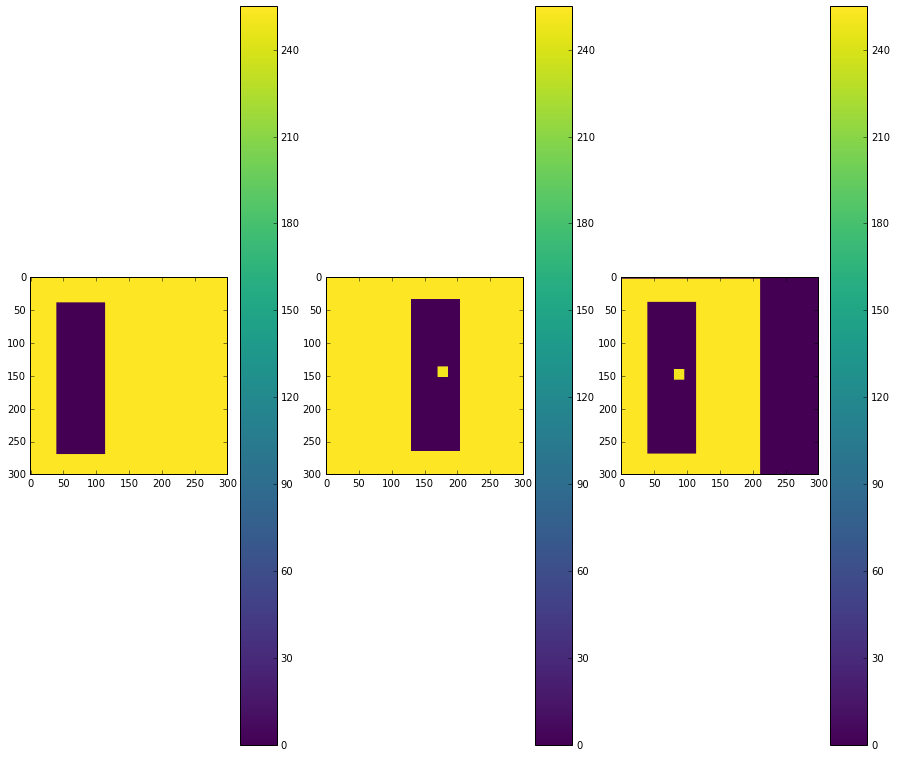

In [65]:
plt.figure(figsize=(15, 15))

plt.subplot(131)
plt.imshow(im1, cmap='viridis')
plt.colorbar()

plt.subplot(132)
plt.imshow(im2, cmap='viridis')
plt.colorbar()

plt.subplot(133)
plt.imshow(new_im2, cmap='viridis')
plt.colorbar()

### Looks like this is working just fine !